In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
(df.isna().sum()/df.shape[0])*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
#df.fillna('Unknown', inplace=True)


In [ ]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

 Create visualizations to represent the distribution of content over different genres.

<ipython-input-7-bcf54640a23d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values[:20], y=genre_counts.index[:20], palette='viridis')


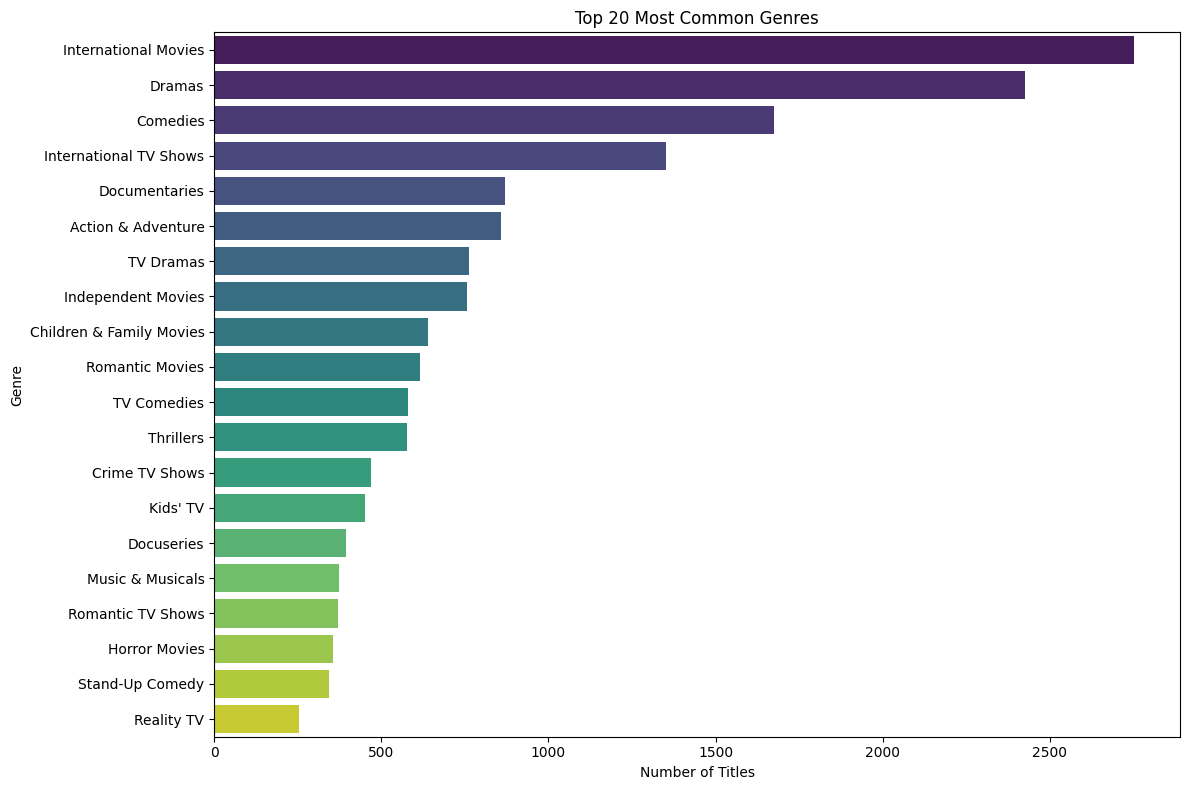

In [ ]:
genre_series = df['listed_in'].dropna().str.split(', ')
genres_exploded = genre_series.explode()


genre_counts = genres_exploded.value_counts()


plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values[:20], y=genre_counts.index[:20], palette='viridis')
plt.title('Top 20 Most Common Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

 Visualize the distribution of content across release years.

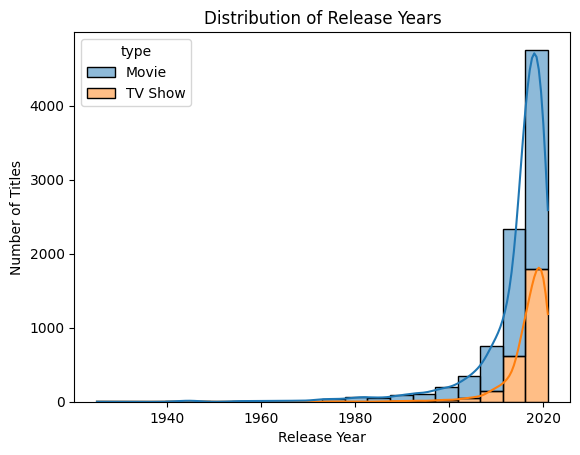

In [ ]:
sns.histplot(data=df, x='release_year', bins=20, kde=True, color='skyblue',hue='type',multiple='stack')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

 Explore the geographical distribution of content (if applicable).

<ipython-input-9-3ef3b9d945c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values[:20], y=country_counts.index[:20], palette='viridis')


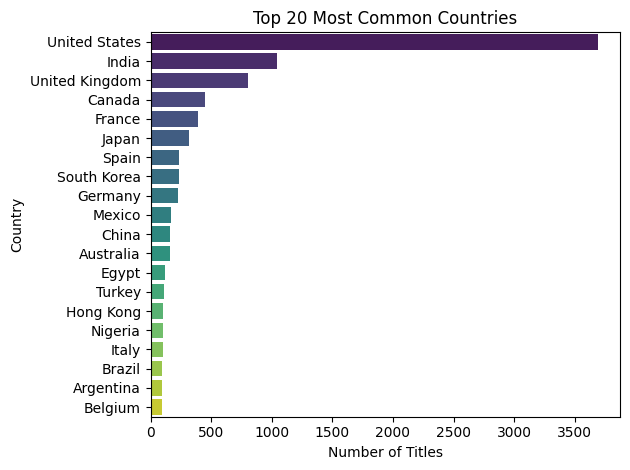

In [ ]:
contet_series = df['country'].dropna().str.split(', ')
country_exploded = contet_series.explode()
country_counts = country_exploded.value_counts()
sns.barplot(x=country_counts.values[:20], y=country_counts.index[:20], palette='viridis')
plt.title('Top 20 Most Common Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


 If there's a temporal component, perform time series analysis to identify trends and patterns over
 time.

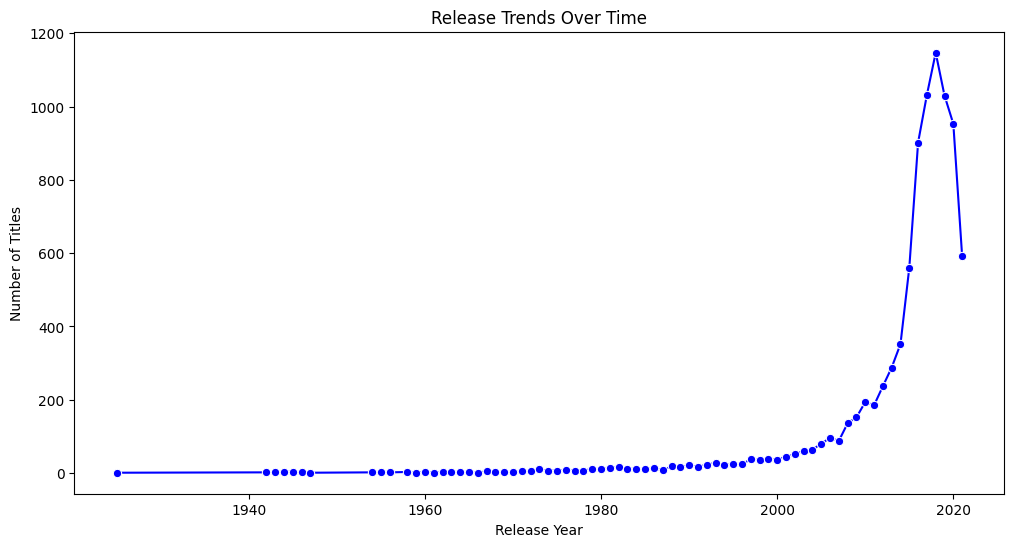

In [ ]:
release_trends = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trends.index, y=release_trends.values, marker='o', color='blue')
plt.title('Release Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

cover date_added to datetime

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

error ='coerce' = This is important:
If Pandas encounters a value that cannot be converted to a valid date, it will replace it with NaT (Not a Time), which is Pandas' equivalent of NaN for datetime types.

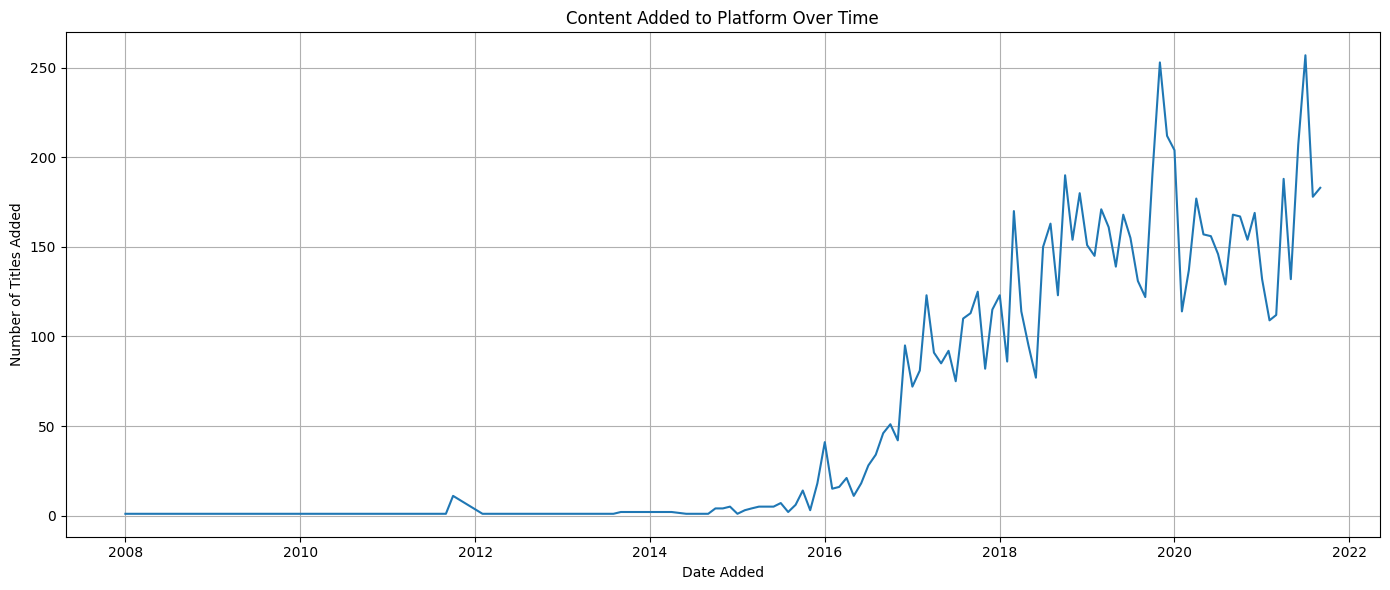

In [ ]:
#extract month/year and group
df['year_month']= df['date_added'].dt.to_period('M')
added_trend = df.groupby('year_month').size()
# conver period index to datetime for ploting
added_trend.index = added_trend.index.to_timestamp()
plt.figure(figsize=(14, 6))
sns.lineplot(x=added_trend.index, y=added_trend.values)
plt.title('Content Added to Platform Over Time')
plt.xlabel('Date Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.tight_layout()
plt.show()

 Analyze the distribution of content ratings

In [ ]:
print(df['rating'].value_counts(dropna=False))

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: count, dtype: int64


<ipython-input-14-1fad64fbd89f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_count.index, y=rating_count.values, palette='viridis')


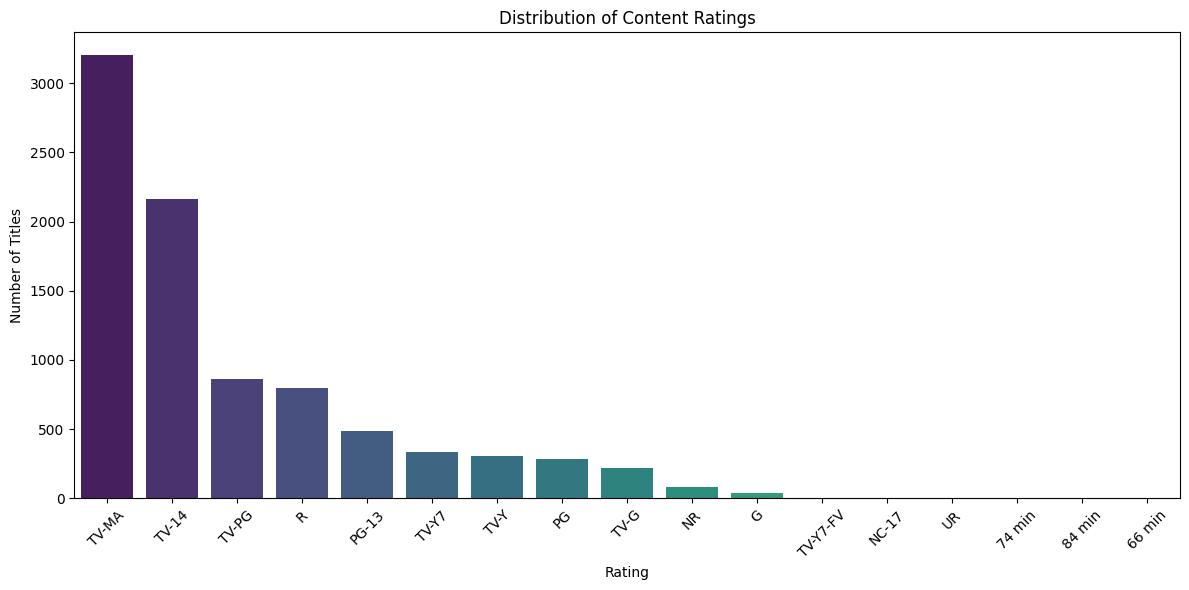

In [ ]:
rating_count =df['rating'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='viridis')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Explore the length of movies or episodes and identify any trends.

In [ ]:
# seperate move and tv show
movies = df[df['type']=='Movie'].copy()
tv_shows = df[df['type']=='TV Show'].copy()

In [ ]:
# remove min and convert into integers
movies['duration_minute'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['duration_minute'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

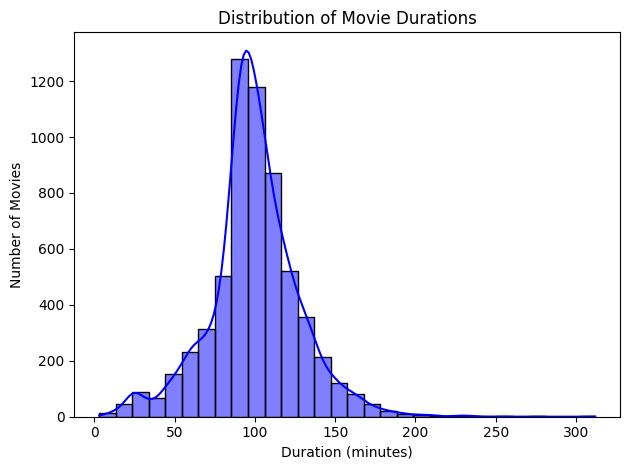

In [ ]:
sns.histplot(movies['duration_minute'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

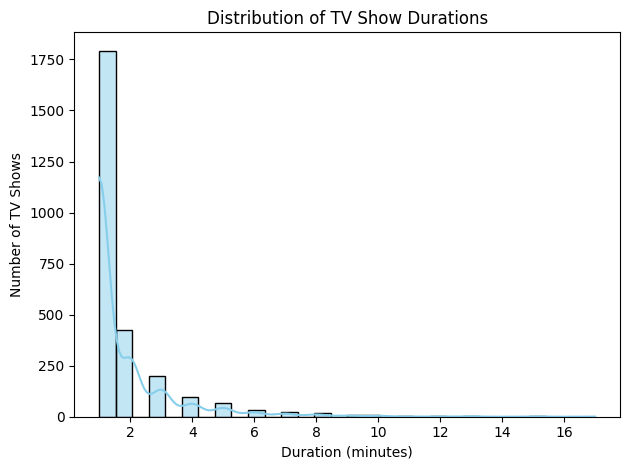

In [ ]:
sns.histplot(tv_shows['duration_minute'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of TV Show Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of TV Shows')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_month'],
      dtype='object')

 Identify and present top-rated movies or TV shows based on user ratings.

In [ ]:
#

 Analyze trends in the popularity of different genres over time.

<ipython-input-21-66503fe07cf4>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

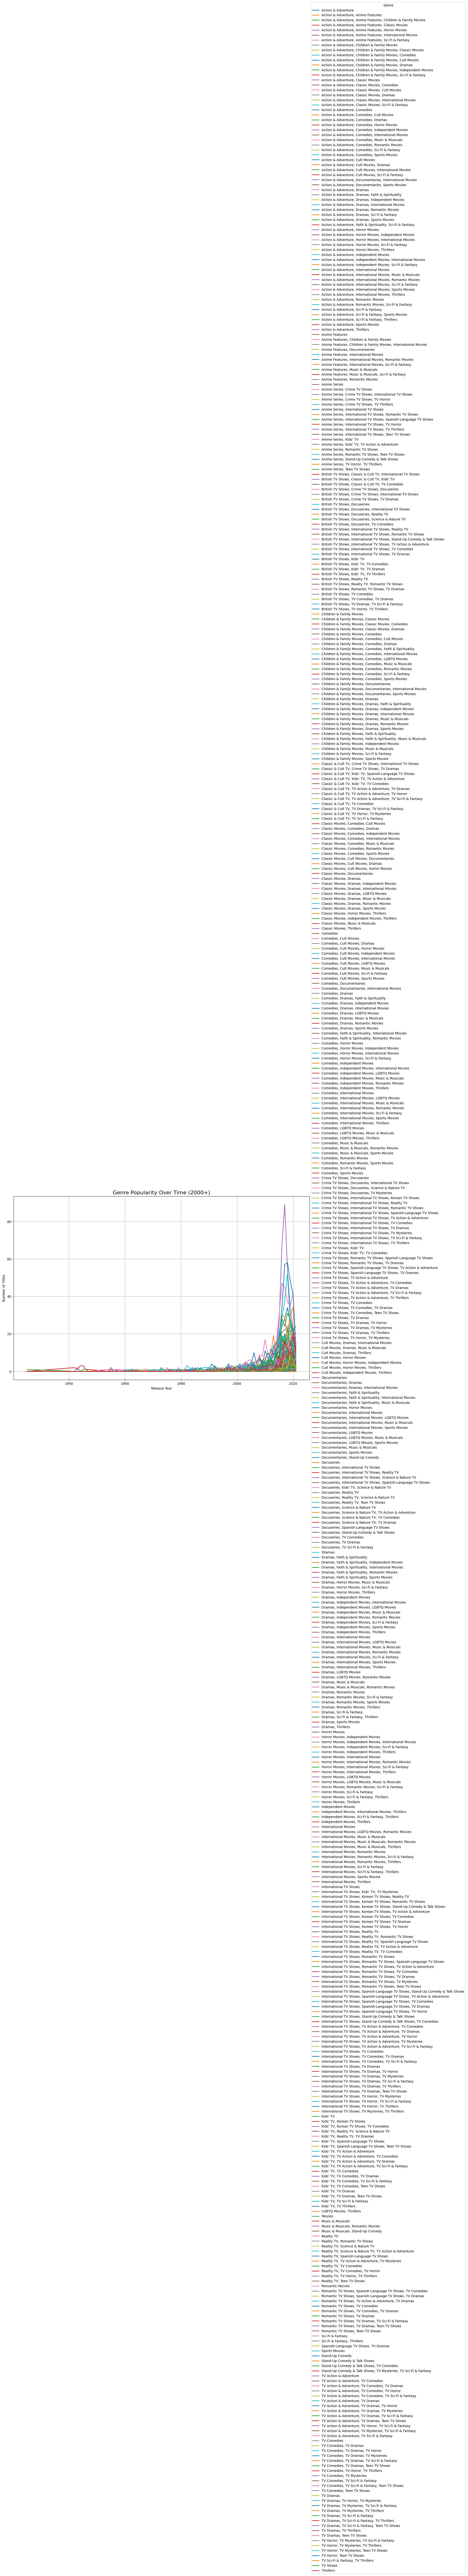

In [ ]:
df_genres = df[['release_year','listed_in']].dropna()
df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('listed_in')
genres_tends = df.groupby(['release_year','listed_in']).size().reset_index(name='count')
genre_pivot = genres_tends.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

plt.figure(figsize=(14,8))

genre_pivot.plot(kind='line', figsize=(16, 10), linewidth=2)
plt.title('Genre Popularity Over Time (2000+)', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()



Geographical Analysis:

Further explore the distribution of content across different countries and regions.

In [ ]:
# Keep only relevant columns
df_country = df[['release_year', 'country']].dropna()

# Split by commas and explode into multiple rows
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country')

country_counts = df_country['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']


In [ ]:
# Group by release year and country
country_year = df_country.groupby(['release_year', 'country']).size().reset_index(name='count')

# Optional: focus on top countries (e.g., top 10 overall)
top_countries = country_counts.head(10)['country']
country_year_top = country_year[country_year['country'].isin(top_countries)]


<ipython-input-24-a29de8b68c24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='country', data=country_counts.head(10), palette='viridis')


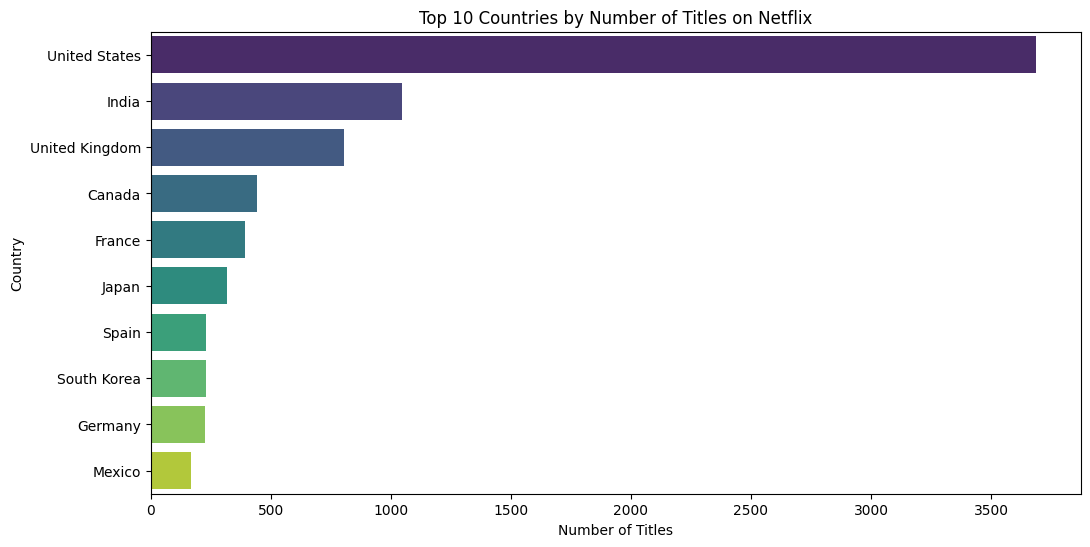

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', data=country_counts.head(10), palette='viridis')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

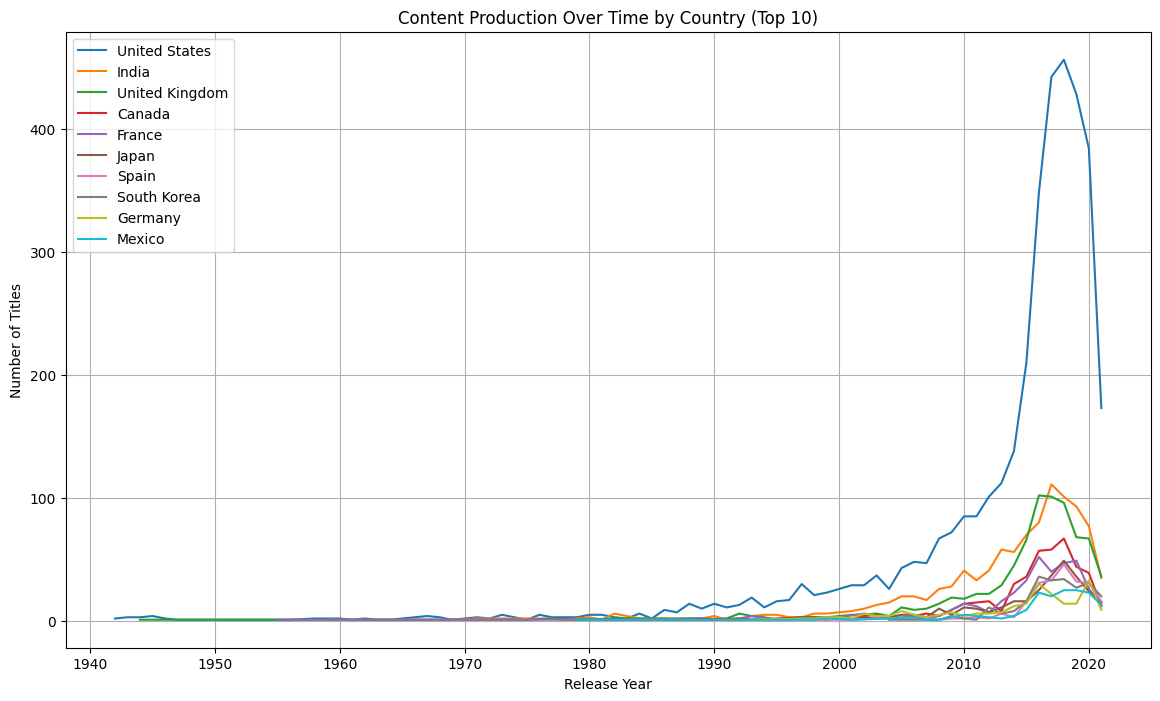

In [ ]:
plt.figure(figsize=(14, 8))
for country in top_countries:
    subset = country_year_top[country_year_top['country'] == country]
    plt.plot(subset['release_year'], subset['count'], label=country)

plt.title('Content Production Over Time by Country (Top 10)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()


Correlation Analysis:

 Investigate potential correlations between variables (e.g., ratings and duration).


In [ ]:
# Split duration into number and type
df_duration = df.copy()
df_duration[['duration_int', 'duration_type']] = df_duration['duration'].str.extract(r'(\d+)\s*(\w+)')
df_duration['duration_int'] = pd.to_numeric(df_duration['duration_int'], errors='coerce')


In [ ]:
df_corr = pd.concat([df_duration[['duration_int', 'release_year']]], axis=1)
corr_matrix = df_corr.corr()


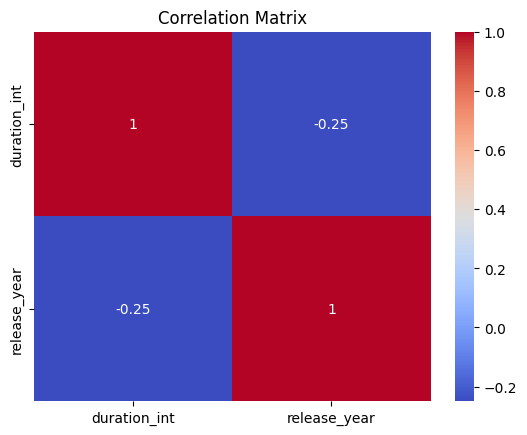

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='rating', ylabel='duration_int'>

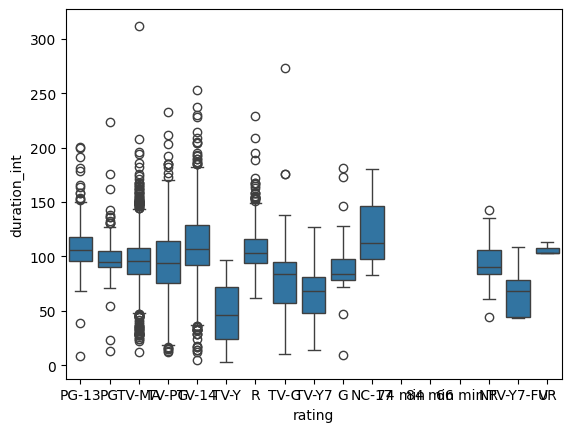

In [ ]:
sns.boxplot(data=df_duration[df_duration['type'] == 'Movie'], x='rating', y='duration_int')


 Content Variety:

 Evaluate the diversity of content by analyzing the number of unique genres and categories.

In [ ]:
 # Make a copy and drop missing
df_genres = df[['show_id', 'type', 'listed_in']].dropna()

# Split genre strings into lists
df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')

# Explode so each genre is on a separate row
df_genres = df_genres.explode('listed_in')


In [ ]:
unique_genres = df_genres['listed_in'].nunique()
print(f"Total unique genres/categories: {unique_genres}")
sorted(df_genres['listed_in'].unique())


Total unique genres/categories: 42


['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [ ]:
genre_counts = df_genres['listed_in'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Top 10
print(genre_counts.head(10))


                      genre  count
0      International Movies   2752
1                    Dramas   2427
2                  Comedies   1674
3    International TV Shows   1351
4             Documentaries    869
5        Action & Adventure    859
6                 TV Dramas    763
7        Independent Movies    756
8  Children & Family Movies    641
9           Romantic Movies    616


In [ ]:
df['num_genres'] = df['listed_in'].dropna().apply(lambda x: len(x.split(', ')))
average_genres = df['num_genres'].mean()
print(f"Average number of genres per title: {average_genres:.2f}")


Average number of genres per title: 2.19


<ipython-input-34-be9ec6168a73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts.head(15), x='count', y='genre', palette='magma')


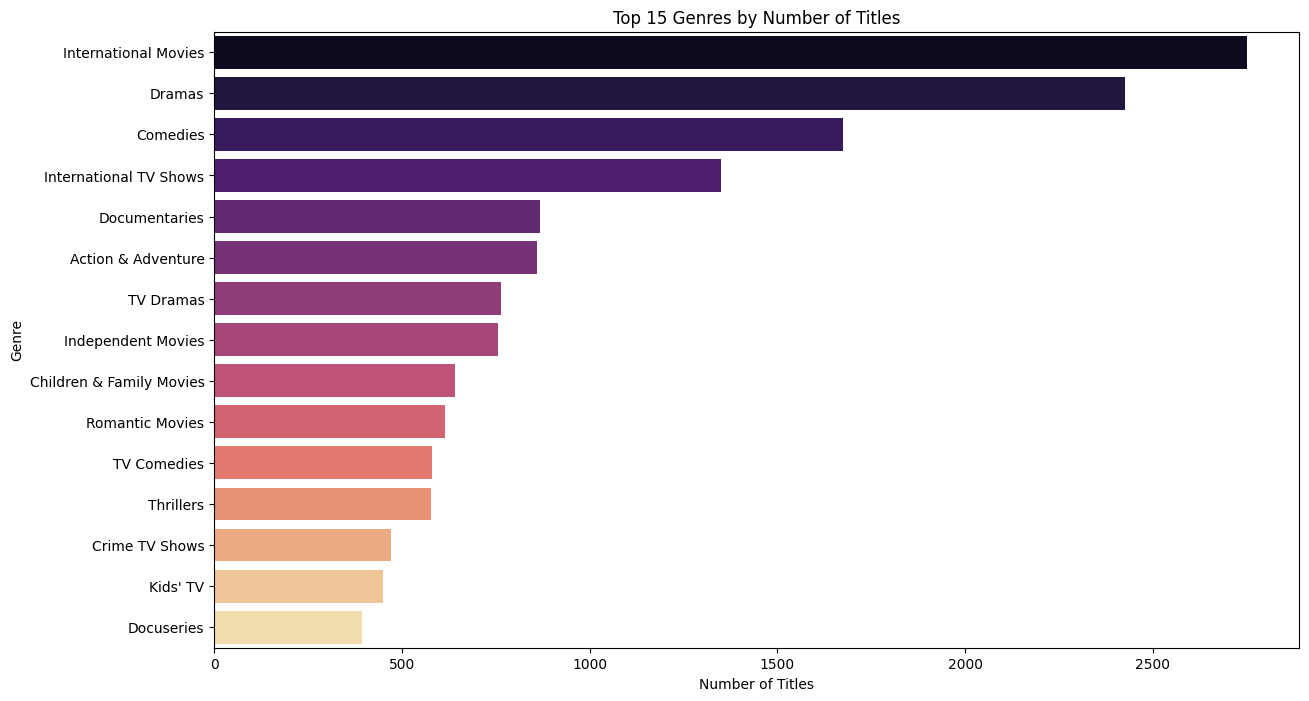

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_counts.head(15), x='count', y='genre', palette='magma')
plt.title('Top 15 Genres by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

 Content Evolution Over Time:

 Explore how the characteristics of content (e.g., duration, ratings) have evolved over the
 years

In [ ]:
df_clean = df[['release_year', 'type', 'duration', 'rating']].dropna()
df_clean[['duration_int', 'duration_type']] = df_clean['duration'].str.extract(r'(\d+)\s*(\w+)')
df_clean['duration_int'] = pd.to_numeric(df_clean['duration_int'], errors='coerce')


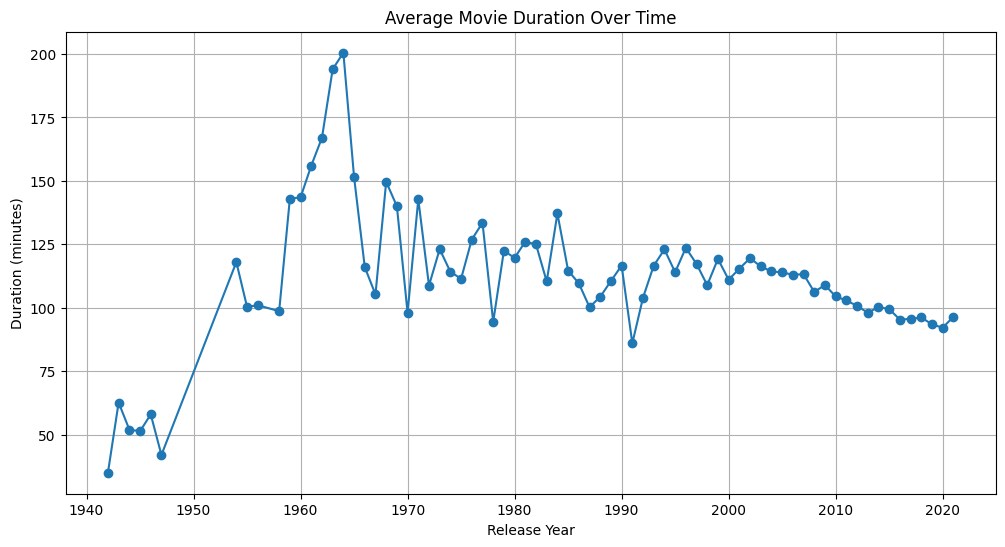

In [ ]:
movies = df_clean[df_clean['type'] == 'Movie']
avg_duration_per_year = movies.groupby('release_year')['duration_int'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(avg_duration_per_year['release_year'], avg_duration_per_year['duration_int'], marker='o')
plt.title('Average Movie Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()


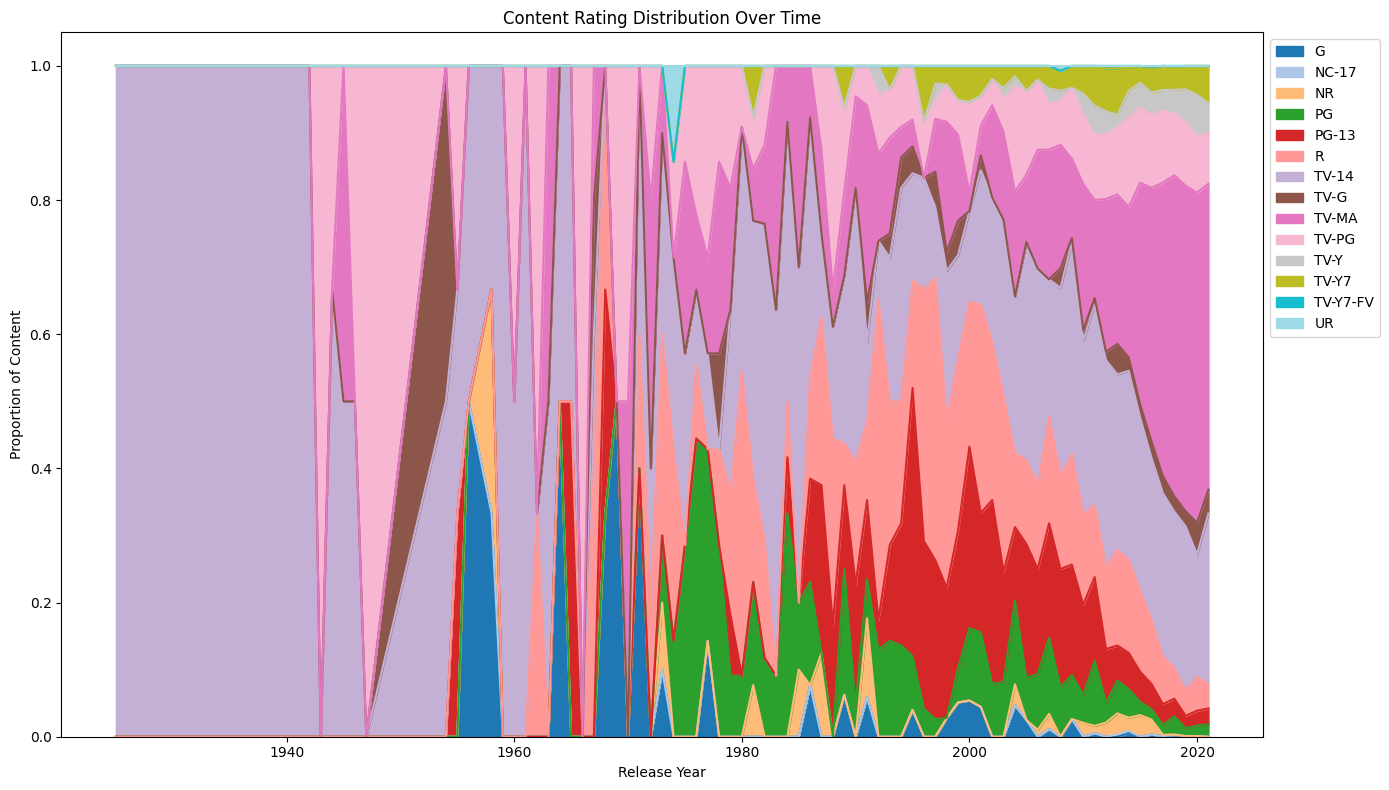

In [ ]:
ratings_over_time = df_clean.groupby(['release_year', 'rating']).size().unstack(fill_value=0)

# Normalize per year (optional: to get % distribution)
ratings_percent = ratings_over_time.div(ratings_over_time.sum(axis=1), axis=0)

ratings_percent.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Content Rating Distribution Over Time')
plt.xlabel('Release Year')
plt.ylabel('Proportion of Content')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


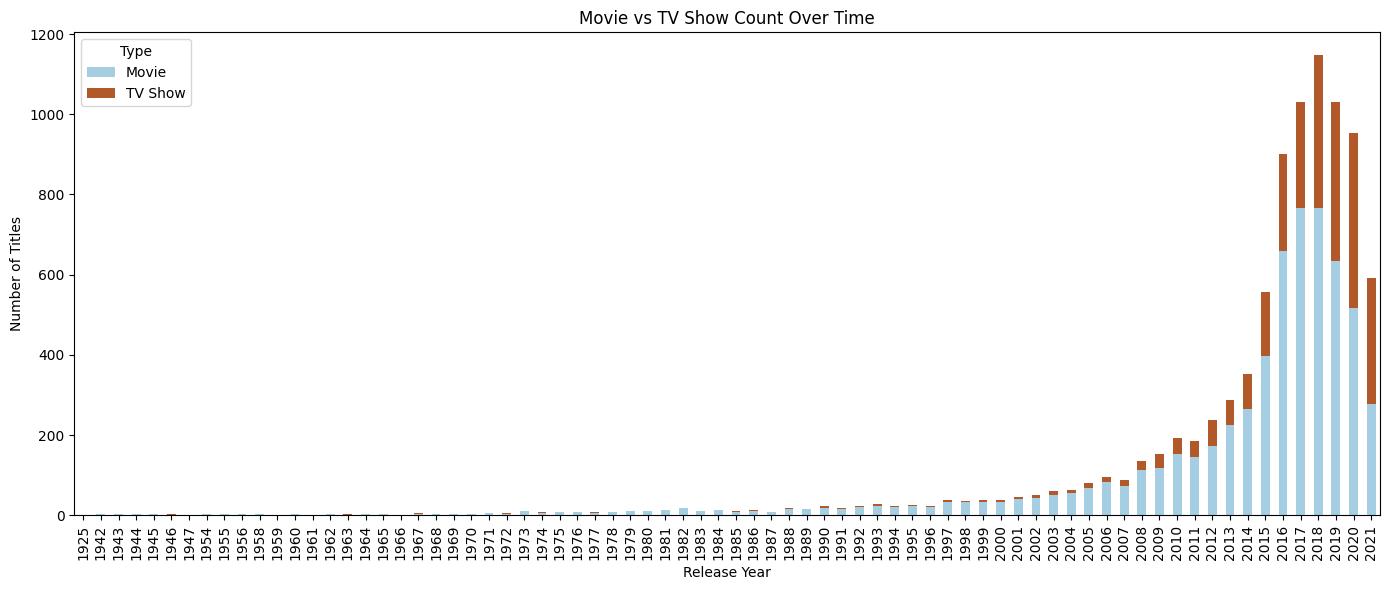

In [ ]:
type_over_time = df_clean.groupby(['release_year', 'type']).size().unstack(fill_value=0)
type_over_time.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Paired')
plt.title('Movie vs TV Show Count Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


 User Preferences:
 Investigate whether certain genres or types of content are more popular among users.

In [ ]:
df_genres = df[['show_id', 'type', 'listed_in']].dropna()
df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('listed_in')


In [ ]:
genre_counts = df_genres['listed_in'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']


In [ ]:
genre_by_type = df_genres.groupby(['listed_in', 'type']).size().unstack(fill_value=0)
genre_by_type['total'] = genre_by_type.sum(axis=1)
genre_by_type = genre_by_type.sort_values(by='total', ascending=False)


<ipython-input-42-cf9743a6a9b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts.head(15), x='count', y='genre', palette='coolwarm')


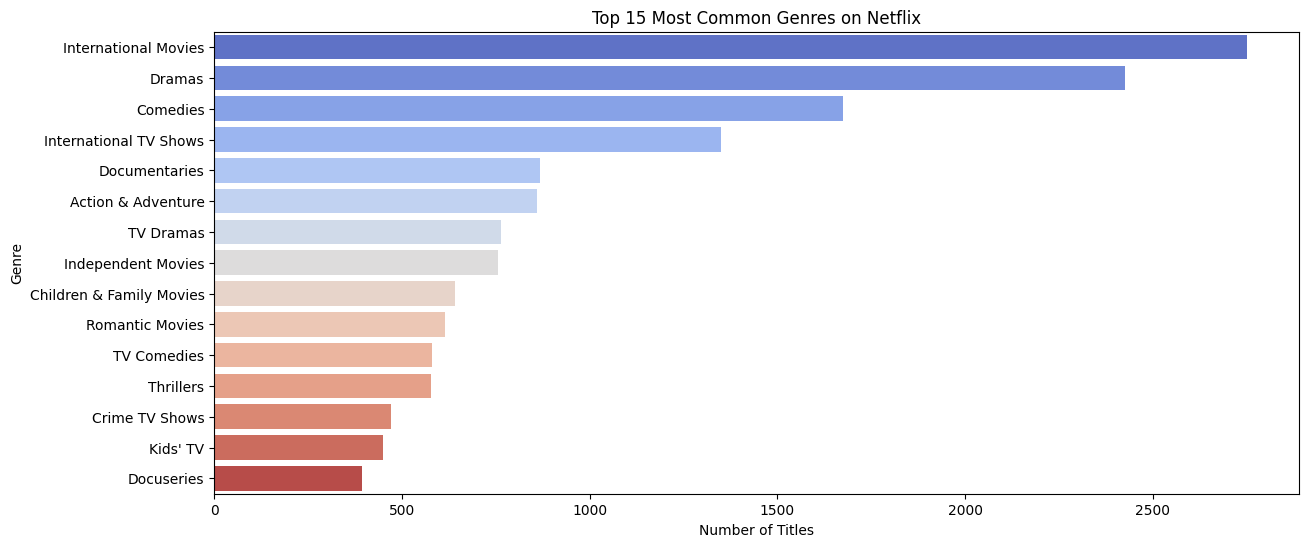

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=genre_counts.head(15), x='count', y='genre', palette='coolwarm')
plt.title('Top 15 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

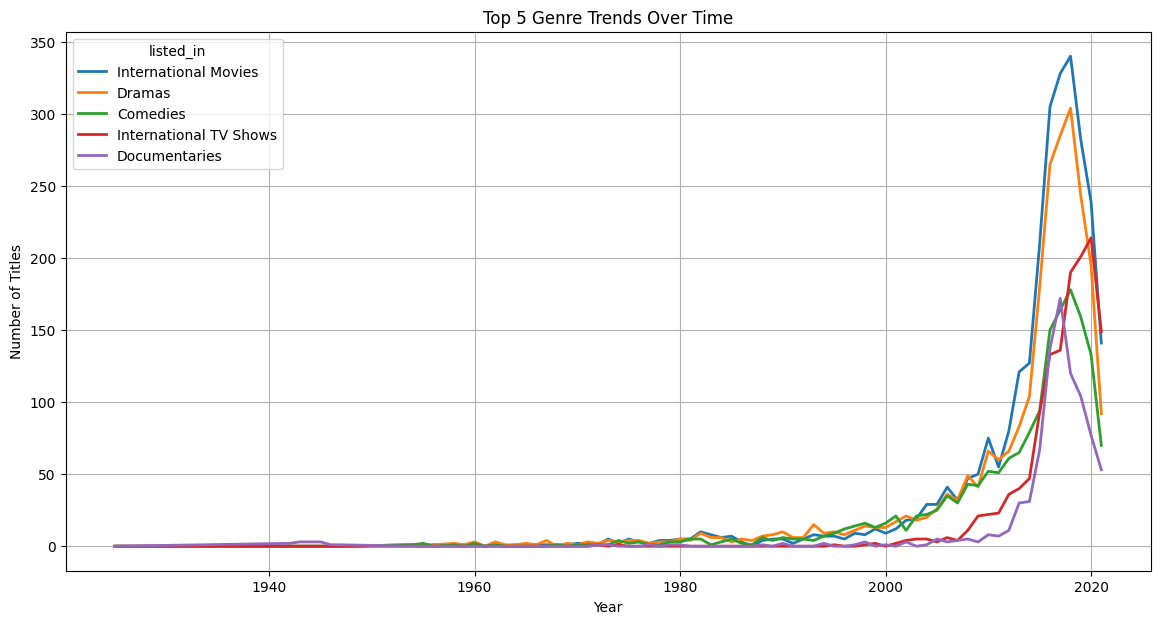

In [ ]:
df_genres_time = df[['release_year', 'listed_in']].dropna()
df_genres_time['listed_in'] = df_genres_time['listed_in'].str.split(', ')
df_genres_time = df_genres_time.explode('listed_in')
genre_year_trend = df_genres_time.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)
top_trending_genres = genre_year_trend.sum().sort_values(ascending=False).head(5).index
genre_year_trend[top_trending_genres].plot(figsize=(14, 7), linewidth=2)
plt.title('Top 5 Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()
